<a href="https://colab.research.google.com/github/rhythmd18/DecisionTreeProject1/blob/main/DecisionTreeProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### We'll perform a classification on the titanic dataset using the Decision Tree model

## 1. Importing the desired libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

## 2. Reading the dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Downloaded datasets/titanic.csv', index_col=0)

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Data preprocessing
Getting rid of the columns which provide no valuable information for training.

In [4]:
df = df.drop(columns=['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'])
df.head()

,Survived,Pclass,Sex,Age,Fare
PassengerId,,,,,
1,0,3,male,22.0,7.2500
2,1,1,female,38.0,71.2833
3,1,3,female,26.0,7.9250
4,1,1,female,35.0,53.1000
5,0,3,male,35.0,8.0500


## 4. Separating the features from the target

In [5]:
features = df.drop(columns=['Survived'])
target = df.Survived

## 5. Encoding the categorical columns to make the data compatible for training

In [6]:
features['Sex'] = features['Sex'].map({'male': 1, 'female': 0})
features.head()

,Pclass,Sex,Age,Fare
PassengerId,,,,
1,3,1,22.0,7.2500
2,1,0,38.0,71.2833
3,3,0,26.0,7.9250
4,1,0,35.0,53.1000
5,3,1,35.0,8.0500


## 6. Data cleaning
Addressing the issue of null values.

In [7]:
features.isna().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [8]:
features['Age'] = features['Age'].fillna(features['Age'].mean())

In [9]:
features['Age'][:10]

PassengerId
1     22.000000
2     38.000000
3     26.000000
4     35.000000
5     35.000000
6     29.699118
7     54.000000
8      2.000000
9     27.000000
10    14.000000
Name: Age, dtype: float64

## 7. Splitting the dataset into training and testing data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=10)

## 8. Building the model and fitting the data in it

In [11]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [12]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 9. Calculating the accuracy of the model performance

In [13]:
model_accuracy = model.score(X_test, y_test)

print(f"Accuracy: {model_accuracy * 100:.2f}%")

Accuracy: 77.61%


### Let's visualize the tree

[Text(0.3900082236842105, 0.9814814814814815, 'x[1] <= 0.5\ngini = 0.479\nsamples = 623\nvalue = [375, 248]'),
 Text(0.1762218045112782, 0.9444444444444444, 'x[0] <= 2.5\ngini = 0.382\nsamples = 226\nvalue = [58, 168]'),
 Text(0.06296992481203008, 0.9074074074074074, 'x[2] <= 3.0\ngini = 0.123\nsamples = 122\nvalue = [8, 114]'),
 Text(0.041353383458646614, 0.8703703703703703, 'x[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.03383458646616541, 0.8333333333333334, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.04887218045112782, 0.8333333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08458646616541353, 0.8703703703703703, 'x[3] <= 26.125\ngini = 0.11\nsamples = 120\nvalue = [7, 113]'),
 Text(0.06390977443609022, 0.8333333333333334, 'x[2] <= 56.0\ngini = 0.24\nsamples = 43\nvalue = [6, 37]'),
 Text(0.05639097744360902, 0.7962962962962963, 'x[2] <= 27.5\ngini = 0.21\nsamples = 42\nvalue = [5, 37]'),
 Text(0.03759398496240601, 0.7592592592592593, 'x[2] <

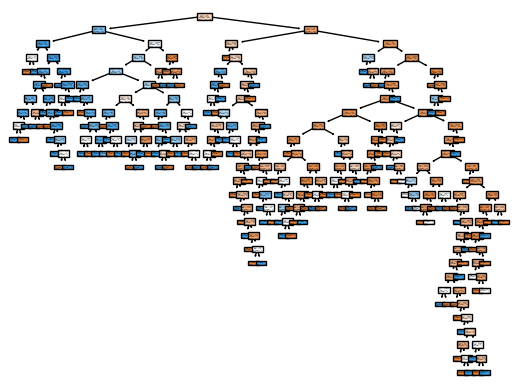

In [14]:
tree.plot_tree(model, filled=True)

## 10. Cost Complexity Pruning
Cost complexity pruning is a technique used to control the size of a decision tree and prevent overfitting.

In [15]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

### 10.1 <b>ccp_alpha</b> is a parameter in the DecisionTreeClassifier that is used for cost complexity pruning.
 Greater values of ccp_alpha increase the number of nodes pruned from the tree. The `ccp_alphas` gives the minimum leaf value of the decision tree, and each <b>ccp_alpha</b> will create a different classifier and choose the best one out of it

In [16]:
ccp_alphas

array([0.        , 0.00017265, 0.00018344, 0.00022031, 0.00032103,
       0.00062422, 0.00068792, 0.00071339, 0.00080257, 0.0008937 ,
       0.00093633, 0.00096818, 0.00098778, 0.00105619, 0.00109056,
       0.00110066, 0.00116737, 0.00118899, 0.00120385, 0.00121871,
       0.00122296, 0.00128411, 0.0013185 , 0.0013387 , 0.00137583,
       0.00138857, 0.00139184, 0.00140052, 0.00144462, 0.00144462,
       0.00145921, 0.00150721, 0.00152488, 0.0015774 , 0.00160514,
       0.00160514, 0.00171215, 0.00172623, 0.00198897, 0.0020429 ,
       0.00236393, 0.00236546, 0.00238691, 0.00243202, 0.00248261,
       0.00256822, 0.00279331, 0.00284574, 0.00318675, 0.00404973,
       0.00417698, 0.0045861 , 0.00529166, 0.00603482, 0.00925793,
       0.01025499, 0.01750245, 0.03106933, 0.13574174])

## 11. Creating different models using each of the ccp_alpha value and choosing the best performing model

In [17]:
models = []
for ccp_alpha in ccp_alphas:
  model = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  model.fit(X_train, y_train)
  models.append(model)

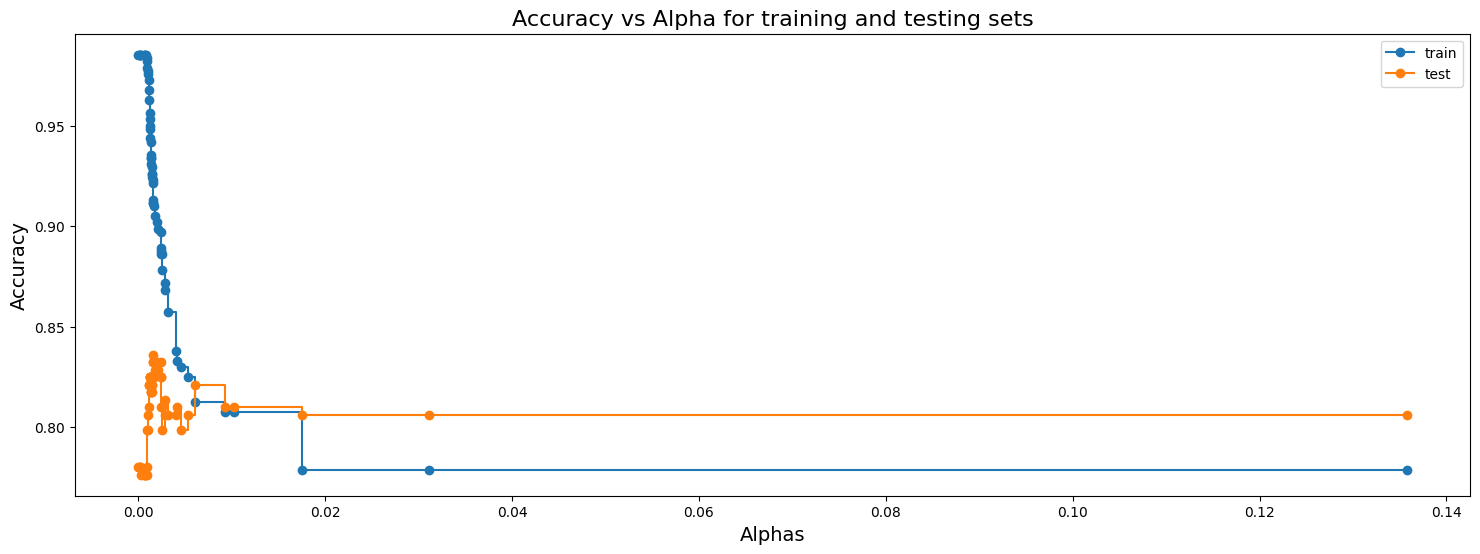

In [18]:
train_scores = [model.score(X_train, y_train) for model in models]
test_scores = [model.score(X_test, y_test) for model in models]

fig, ax = plt.subplots(figsize=(18, 6))
ax.set_xlabel('Alphas', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Accuracy vs Alpha for training and testing sets', fontsize=16)
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [19]:
model = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.003)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.003, random_state=0)

In [20]:
model_accuracy = model.score(X_test, y_test)
print(f'Accuracy: {model_accuracy * 100:.2f}%')

Accuracy: 81.34%


Model's performance improved after pruning

### Let's visualize the tree after pruning

[Text(0.35714285714285715, 0.9444444444444444, 'x[1] <= 0.5\ngini = 0.479\nsamples = 623\nvalue = [375, 248]'),
 Text(0.14285714285714285, 0.8333333333333334, 'x[0] <= 2.5\ngini = 0.382\nsamples = 226\nvalue = [58, 168]'),
 Text(0.09523809523809523, 0.7222222222222222, 'gini = 0.123\nsamples = 122\nvalue = [8, 114]'),
 Text(0.19047619047619047, 0.7222222222222222, 'x[3] <= 24.808\ngini = 0.499\nsamples = 104\nvalue = [50, 54]'),
 Text(0.14285714285714285, 0.6111111111111112, 'x[2] <= 36.0\ngini = 0.466\nsamples = 84\nvalue = [31, 53]'),
 Text(0.09523809523809523, 0.5, 'x[3] <= 7.763\ngini = 0.45\nsamples = 79\nvalue = [27, 52]'),
 Text(0.047619047619047616, 0.3888888888888889, 'gini = 0.266\nsamples = 19\nvalue = [3, 16]'),
 Text(0.14285714285714285, 0.3888888888888889, 'x[2] <= 23.5\ngini = 0.48\nsamples = 60\nvalue = [24, 36]'),
 Text(0.09523809523809523, 0.2777777777777778, 'x[2] <= 6.5\ngini = 0.498\nsamples = 30\nvalue = [16, 14]'),
 Text(0.047619047619047616, 0.16666666666666666,

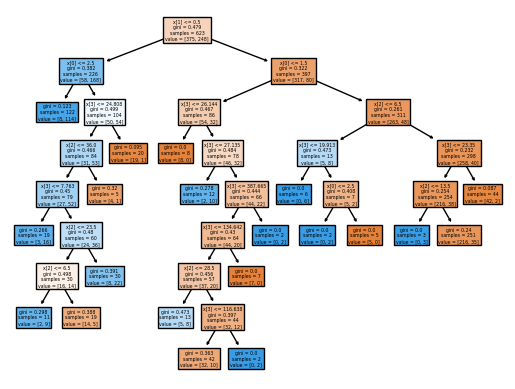

In [22]:
tree.plot_tree(model, filled=True)